# Derivative of Matrix

## import library

In [150]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

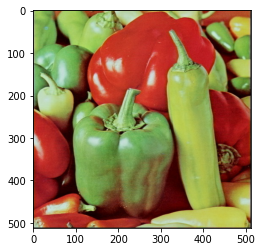

In [151]:
I = img.imread('pepper.jpg')  
plt.imshow(I)
plt.show()

## check the size of image

In [152]:
n_row = I.shape[0]
n_col = I.shape[1]

print(I.shape)

(512, 512, 3)


## convert the input image into gray scale if it is color

In [153]:
if I.shape[2] == 3:
    I = I.mean(axis=2).astype(np.float32)
    print(I.shape)

(512, 512)


## normalize input image so that the range of image is $[0, 1]$

In [154]:
I = (I - I.min()) / (I.max() - I.min())
print(I)

[[0.01706037 0.00262467 0.00787402 ... 0.02624672 0.00131234 0.02887139]
 [0.         0.79396325 0.60367453 ... 0.46194226 0.44225723 0.01968504]
 [0.01312336 0.76902884 0.61811024 ... 0.4160105  0.47506562 0.01968504]
 ...
 [0.00524934 0.92257214 0.7624672  ... 0.48293963 0.4606299  0.00524934]
 [0.00787402 0.9081365  0.72309715 ... 0.43700787 0.4488189  0.00524934]
 [0.00393701 0.00131234 0.00656168 ... 0.01181102 0.00787402 0.0144357 ]]


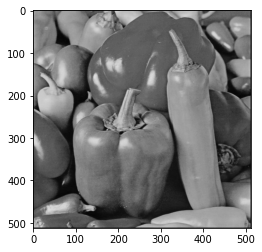

In [155]:
plt.imshow(I,cmap=plt.get_cmap('gray'))
plt.show()

```git commit -a -m "load image" ``` \
```git push origin master```

## compute the derivative of $I$ with respect to $x$-direction

In [156]:
Ix=[]
i=0
for i in range(len(I)):
    x=[]
    j=0
    
    x.append(0-I[0][len(I[0])-1])
    for j in range(len(I[i])-2,-1,-1):
        x.append(I[i][j]-I[i][j+1])
        j-=1
        
    Ix.append(x)
    i+=1
Ix=np.array(Ix)

## generate a matrix to compute the derivative in $x$-direction

In [157]:
Dx = np.linalg.inv(I)@Ix

```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## compute the derivative of $I$ with respect to $y$-direction

In [160]:
Iy=[]
i=0
for i in range(len(I)):
    y=[]
    j=0
    
    for j in range(len(I[i])-1,-1,-1):
        if i==len(I)-1:
            y.append(0-I[i][j])
        else:
            y.append(I[i+1][j]-I[i][j])
        j-=1
        
    Iy.append(y)
    i+=1
Iy=np.array(Iy)

## generate a matrix to compute the derivative in $y$-direction

In [161]:
Dy = Iy@np.linalg.inv(I)

```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [168]:
norm_gradient = Ix*Ix + Iy*Iy

## define functions for the visualization

In [169]:
def plot_image(I):
    
    plt.figure(figsize=(10,10))
    plt.imshow(I,cmap=plt.get_cmap('gray'))
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Ix,cmap='gray',norm=colors.LogNorm())
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Iy,cmap='gray',norm=colors.LogNorm())
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient,cmap='gray',norm=colors.LogNorm())
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

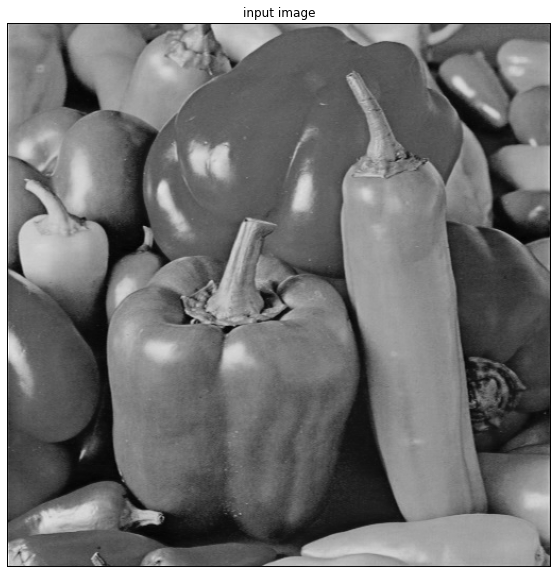

In [170]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

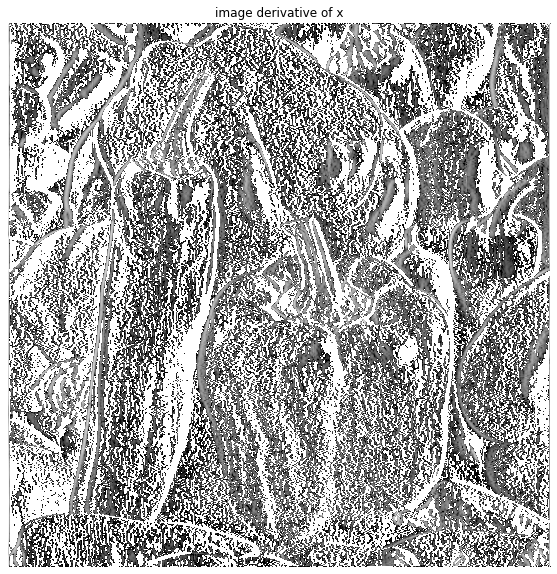

In [171]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

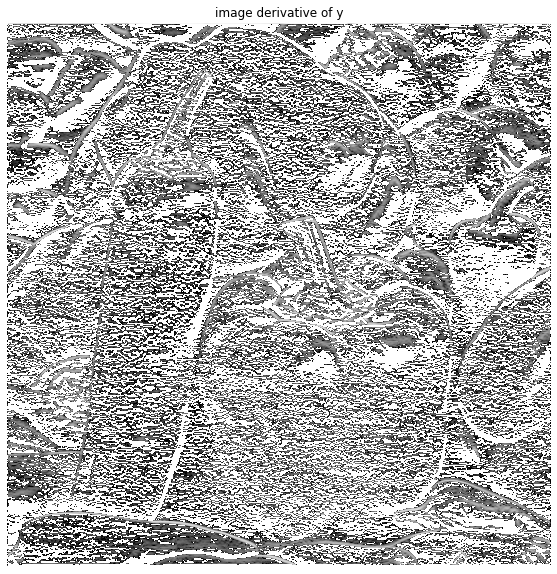

In [172]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

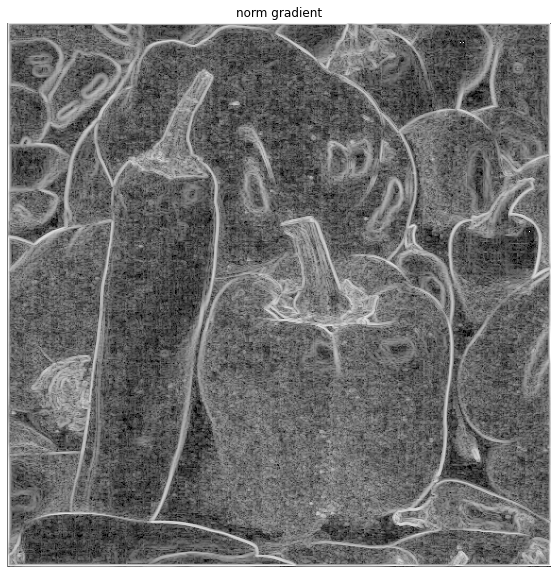

In [173]:
plot_norm_gradient(norm_gradient)